<a href="https://colab.research.google.com/github/Alejandrocg1702/AlejandroCanteroSQL/blob/main/customer_modify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd ## importamos el dataset
df = pd.read_csv("/content/drive/MyDrive/customer/customer_modify.csv")
df.head()

,customer_id,first_name,last_name,email,active,address,district,postal_code,city,country,rental_date,return_date,amount,payment_date,rental_duration
0,1,mary,smith,mary.smith@sakilacustomer.org,1,1913 hanoi way,nagasaki,35200,sasebo,japan,2005-05-25 11:30:37,2005-06-03 12:00:37,2.99,2005-05-25 11:30:37,9
1,1,mary,smith,mary.smith@sakilacustomer.org,1,1913 hanoi way,nagasaki,35200,sasebo,japan,2005-05-28 10:35:23,2005-06-03 06:32:23,0.99,2005-05-28 10:35:23,6
2,1,mary,smith,mary.smith@sakilacustomer.org,1,1913 hanoi way,nagasaki,35200,sasebo,japan,2005-06-15 00:54:12,2005-06-23 02:42:12,5.99,2005-06-15 00:54:12,8
3,1,mary,smith,mary.smith@sakilacustomer.org,1,1913 hanoi way,nagasaki,35200,sasebo,japan,2005-06-15 18:02:53,2005-06-19 15:54:53,0.99,2005-06-15 18:02:53,4
4,1,mary,smith,mary.smith@sakilacustomer.org,1,1913 hanoi way,nagasaki,35200,sasebo,japan,2005-06-15 21:08:46,2005-06-25 02:26:46,9.99,2005-06-15 21:08:46,10


In [8]:
# Cargamos las librerias


import pandas as pd  # manejo de datos
import numpy as np   # operaciones numéricas
import plotly as pl  # visualizaciones interactivas
import seaborn as sns # gráficos estadísticos
import missingno as msno # visualizar datos faltantes
import matplotlib.pyplot as plt

## Mostraria informacion general del dataset

In [9]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1000 non-null   int64  
 1   first_name       1000 non-null   object 
 2   last_name        1000 non-null   object 
 3   email            1000 non-null   object 
 4   active           1000 non-null   int64  
 5   address          1000 non-null   object 
 6   district         966 non-null    object 
 7   postal_code      1000 non-null   int64  
 8   city             1000 non-null   object 
 9   country          1000 non-null   object 
 10  rental_date      1000 non-null   object 
 11  return_date      1000 non-null   object 
 12  amount           1000 non-null   float64
 13  payment_date     1000 non-null   object 
 14  rental_duration  1000 non-null   int64  
dtypes: float64(1), int64(4), object(10)
memory usage: 117.3+ KB


In [10]:
date_cols = ["rental_date", "return_date", "payment_date"]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")
df[date_cols].head()

,rental_date,return_date,payment_date
0,2005-05-25 11:30:37,2005-06-03 12:00:37,2005-05-25 11:30:37
1,2005-05-28 10:35:23,2005-06-03 06:32:23,2005-05-28 10:35:23
2,2005-06-15 00:54:12,2005-06-23 02:42:12,2005-06-15 00:54:12
3,2005-06-15 18:02:53,2005-06-19 15:54:53,2005-06-15 18:02:53
4,2005-06-15 21:08:46,2005-06-25 02:26:46,2005-06-15 21:08:46


## Vemos una muestra descriptiva de lo que analizaremos posteriormente.



In [11]:
df.count()

,0
customer_id,1000
first_name,1000
last_name,1000
email,1000
active,1000
address,1000
district,966
postal_code,1000
city,1000
country,1000


In [12]:
df.describe()

,customer_id,active,postal_code,rental_date,return_date,amount,payment_date,rental_duration
count,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000.000000
mean,18.706000,0.972000,50623.087000,2005-07-20 11:40:24.418999936,2005-07-25 11:06:45.419000064,4.152000,2005-07-20 11:40:24.418999936,4.987000
min,1.000000,0.000000,1027.000000,2005-05-25 01:10:47,2005-05-26 16:23:51,0.990000,2005-05-25 01:10:47,0.000000
25%,9.000000,1.000000,34021.000000,2005-07-06 16:02:06.750000,2005-07-10 04:00:16,2.990000,2005-07-06 16:02:06.750000,3.000000
50%,19.000000,1.000000,49521.000000,2005-07-28 16:27:58,2005-08-02 01:04:37.500000,3.990000,2005-07-28 16:27:58,5.000000
75%,28.000000,1.000000,72192.000000,2005-08-17 12:12:09.250000,2005-08-20 03:02:48.250000,4.990000,2005-08-17 12:12:09.250000,7.000000
max,37.000000,1.000000,99865.000000,2005-08-23 22:25:26,2005-09-01 14:06:38,11.990000,2005-08-23 22:25:26,10.000000
std,10.497131,0.165055,26459.555567,NaN,NaN,2.406563,NaN,2.622157


## Buscamos duplicados.

In [13]:
df.duplicated().sum()

np.int64(0)

## Buscamos valores nulos.

In [14]:
df.isna().sum().sort_values(ascending=False)

,0
district,34
first_name,0
customer_id,0
last_name,0
email,0
active,0
address,0
postal_code,0
city,0
country,0


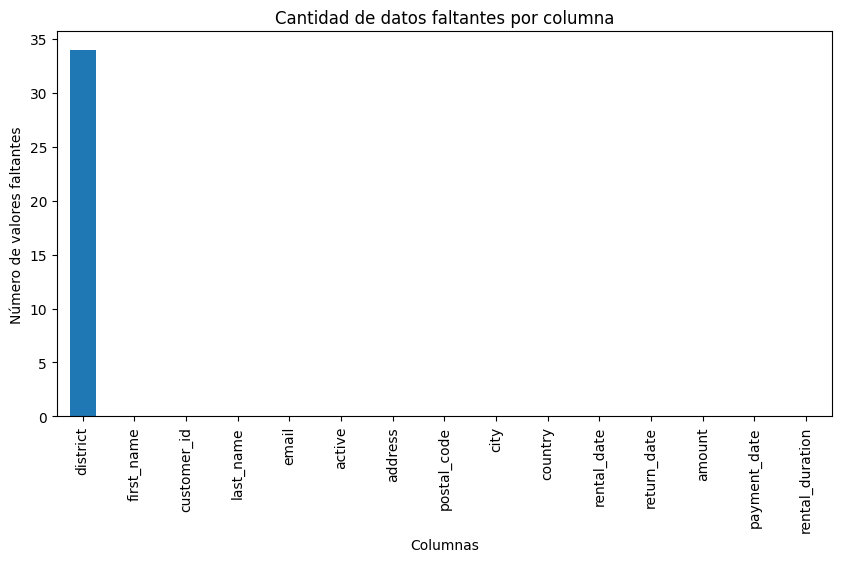

In [15]:
missing = df.isna().sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
missing.plot(kind="bar")
plt.title("Cantidad de datos faltantes por columna")
plt.ylabel("Número de valores faltantes")
plt.xlabel("Columnas")
plt.show()

In [16]:
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)
print(missing_pct)

district           3.4
first_name         0.0
customer_id        0.0
last_name          0.0
email              0.0
active             0.0
address            0.0
postal_code        0.0
city               0.0
country            0.0
rental_date        0.0
return_date        0.0
amount             0.0
payment_date       0.0
rental_duration    0.0
dtype: float64


## Creamos un bloque nuevo

In [17]:
text_cols = ["first_name", "last_name", "email", "address", "city", "country"]

for col in text_cols:
    df[col] = df[col].astype(str).str.lower().str.strip()

## Filtramos montos no validos

In [18]:
df = df[df["amount"] > 0]

## Hacemos un nuevo bloque en la busqueda de outliers, la cual nos percatamos de que: Los valores atípicos se deben a clientes que realizaron pagos más elevados, probablemente asociados a alquileres múltiples, retrasos o suplementos aplicados según la política de la tienda, aunque son poco frecuentes, estos valores no parecen ser errores, sino variaciones normales del negocio, y por ello se pueden conservar o filtrar según el objetivo del análisis

## La mayor parte de los pagos se concentran entre los 3-5 dolares, los circulos situados a la derecha representan pagos que superan los 8-12$ son valores poco frecuentes.


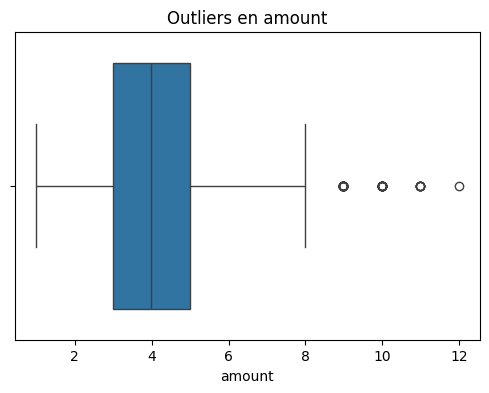

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["amount"])
plt.title("Outliers en amount")
plt.show()

Q1 = df["amount"].quantile(0.25)
Q3 = df["amount"].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

df = df[(df["amount"] >= lim_inf) & (df["amount"] <= lim_sup)]

## Creamos nueva columna duracion de alquiler

In [20]:
df["rental_duration_days"] = (df["return_date"] - df["rental_date"]).dt.days
df = df[df["rental_duration_days"] >= 0]

## Vemos la grafica de como se distribuyen los pagos, a que precio vendemos mas.

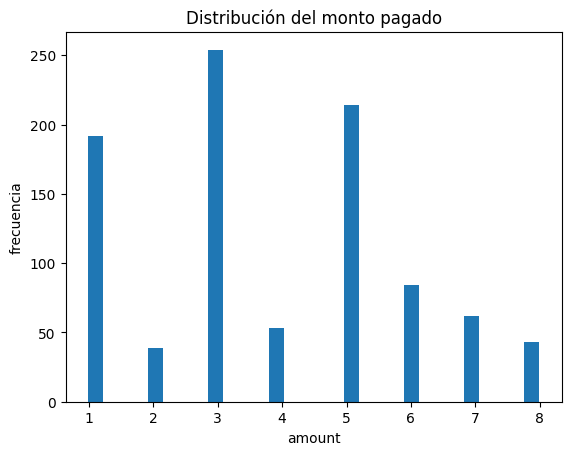

In [21]:
plt.hist(df["amount"], bins=30)
plt.title("Distribución del monto pagado")
plt.xlabel("amount")
plt.ylabel("frecuencia")
plt.show()

## Aqui vemos el tiempo que estan en alquiler.

## Comprobamos que la mayor intensidad de alquileres se concentra entre los dias 2 y 4 por eso la delimitamos con una suave linea azul.


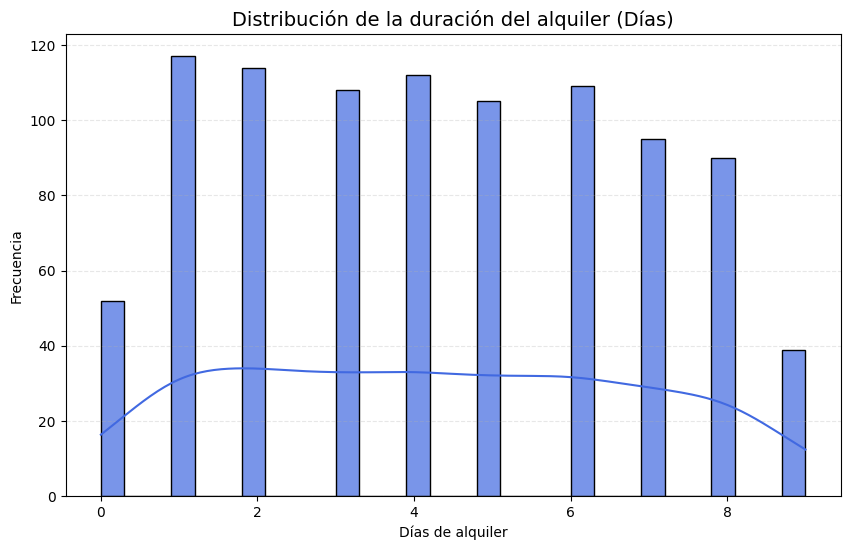

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(df["rental_duration_days"], kde=True, bins=30, color="royalblue", alpha=0.7)
plt.title("Distribución de la duración del alquiler (Días)", fontsize=14)
plt.xlabel("Días de alquiler")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


## Aqui vemos los dias de mas trafico y alquileres.

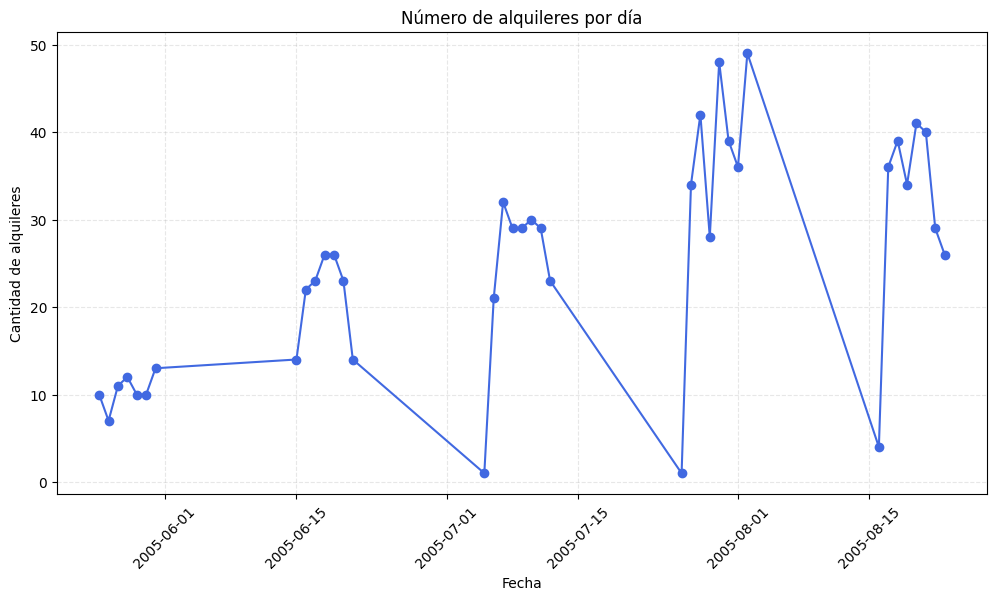

In [23]:
# Convertimos rental_date solo al día
df["rental_day"] = df["rental_date"].dt.date

# Agrupamos por día
rentals_per_day = df.groupby("rental_day").size()

plt.figure(figsize=(12,6))
plt.plot(rentals_per_day.index, rentals_per_day.values, marker='o', color='royalblue')
plt.title("Número de alquileres por día")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de alquileres")
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(rotation=45)
plt.show()


## Aqui podriamos ver el dia y lo que ha generado el videoclub por dia.

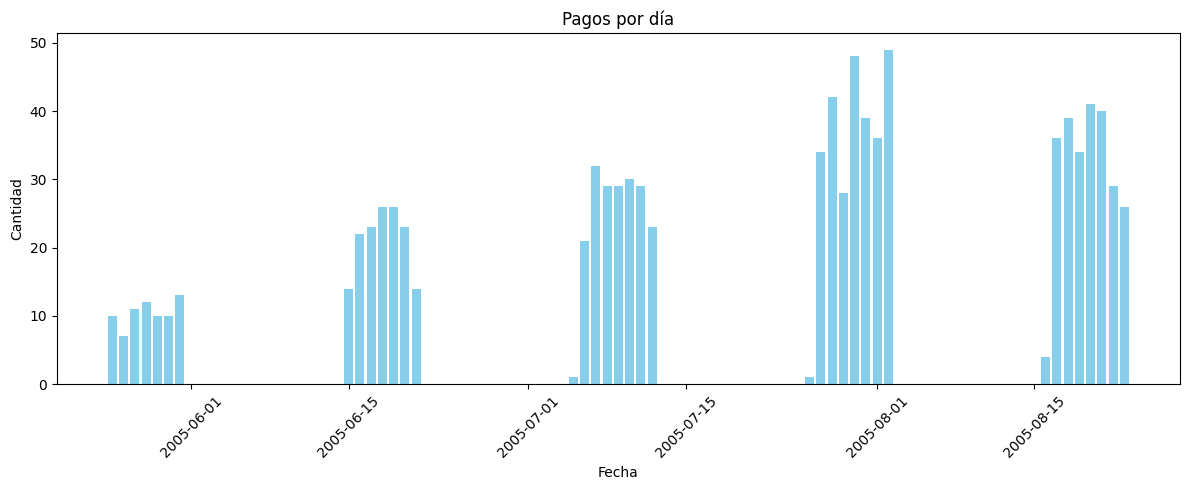

In [24]:
df["payment_day"] = df["payment_date"].dt.date
payments_per_day = df.groupby("payment_day").size()

plt.figure(figsize=(12,5))
plt.bar(payments_per_day.index, payments_per_day.values, color="skyblue")
plt.title("Pagos por día")
plt.xlabel("Fecha")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## En esta grafica podemos ver la duracion media por alquiler y dia.

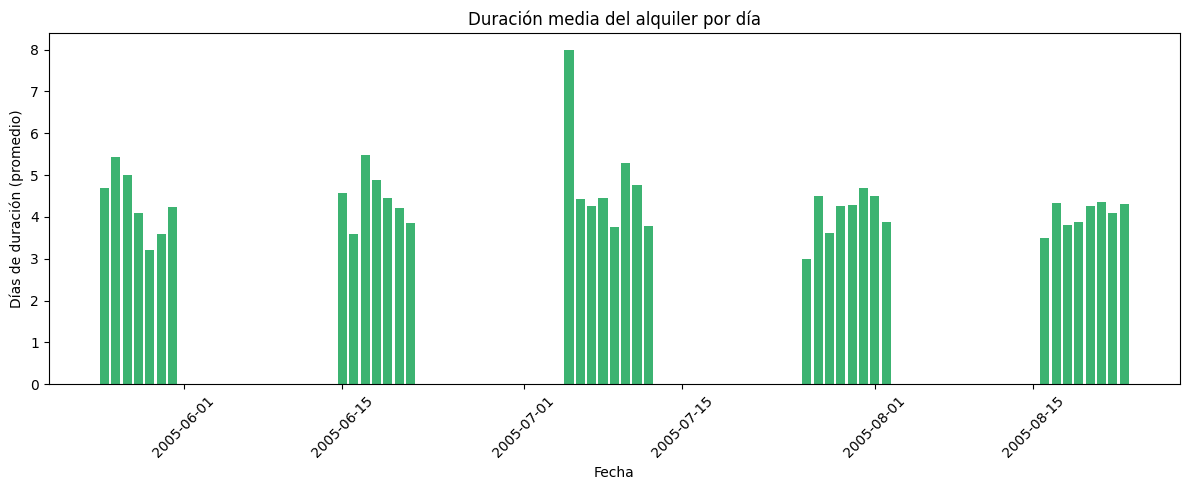

In [25]:
# Asegurar columna de duración
df["rental_duration_days"] = (df["return_date"] - df["rental_date"]).dt.days

# Convertimos la fecha a solo día (sin hora)
df["rental_day"] = df["rental_date"].dt.date

# Calculamos duración media por día
avg_duration_per_day = df.groupby("rental_day")["rental_duration_days"].mean()

# Gráfica en barras
plt.figure(figsize=(12,5))
plt.bar(avg_duration_per_day.index, avg_duration_per_day.values, color="mediumseagreen")
plt.title("Duración media del alquiler por día")
plt.xlabel("Fecha")
plt.ylabel("Días de duración (promedio)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
